In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the data
data = pd.read_csv('Data_Label_merged_df_all_M1&M2_10000row.csv',encoding='latin1')




In [81]:
data

,Unnamed: 0,rating,title_x,text,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,...,Characteristic_M1,Characteristic Score_M1,Characteristic_M2,Characteristic Score_M2,Sentiment_Polarity,Stars,Sentiment Score,Sentiment_Label,Characteristic_Label_M1,Characteristic_Label_M2
0,299491,5,This Product Is Fantastic!!!!!!!,I applied the goop to the tines that were rust...,B07QM2N918,59:41.9,True,Appliances,Light GREY Uber Goop Dishwasher Rack Coating/G...,4.4,...,Install & Replace,0.158420756,Performance,0.224338,positive,5 stars,0.641821,positive,Performance,Performance
1,118359,5,Five Stars,Works good - some crappy black stuff at the st...,B00W0YPGEO,30:14.0,True,Appliances,"Refresh Replacement for Frigidaire WF1CB, RF10...",4.8,...,Performance,0.255545378,Performance,0.255545,positive,4 stars,0.516720,positive,Performance,Performance
2,325538,5,Works great,Easy install and works perfectly,B07CVSR4KJ,07:04.1,True,Appliances,NEBOO AR403 for WB2X9154 GE Roper Gas Range Ov...,5.0,...,Install & Replace,0.631777644,Install & Replace,0.632490,positive,5 stars,0.775075,positive,Install & Replace,Install & Replace
3,191513,5,Five Stars,Perfect replacement for my Frigidaire stove.,B00E0CVZQC,04:17.0,True,Appliances,Frigidaire 316207511 Control Board,4.7,...,Install & Replace,0.351443172,Install & Replace,0.351443,positive,5 stars,0.802508,positive,Install & Replace,Install & Replace
4,144066,5,Loved It!,We love it! It works exactly as planned. It lo...,B0C35WFNZF,27:39.6,True,Appliances,COSMO 5U30 30 in. Under Cabinet Range Hood wit...,4.4,...,Delivery,0.248861343,Emotion,0.193496,positive,5 stars,0.857110,positive,Design,Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,253776,5,Saved me $$$ and easy to install,Just followed the directions and it went very ...,B096ZS8Q4N,27:05.7,True,Appliances,Refrigerator LED Light Board for Whirlpool Ken...,4.6,...,Install & Replace,0.40140149,Install & Replace,0.477885,positive,5 stars,0.655527,positive,Install & Replace,Install & Replace
9996,293315,5,Love this cooktop,Love this cooktop! Some reviews say the knobs ...,B074KW1WFR,08:23.3,True,Appliances,GE PGP9030SLSS 30 Inch Gas Cooktop,4.1,...,Price,0.055507943,Price,0.047698,positive,5 stars,0.784960,positive,Quality,Quality
9997,44273,5,Sturdy,Arrived promptly and in good condition. Sturdy...,B0732DLVBM,52:55.9,True,Appliances,STEADY-PAD Anti-Vibration and Anti-Walk Washer...,4.3,...,Quality,0.350273848,Price,0.255799,positive,5 stars,0.525367,positive,Price,Price
9998,225161,5,Perfect fitting belt,This replacement belt fit perfect. The company...,B001TIWG04,08:48.0,True,Appliances,Whirlpool Dryer Belt 40111201,4.2,...,Install & Replace,0.253692508,Install & Replace,0.253693,positive,5 stars,0.839189,positive,Install & Replace,Install & Replace


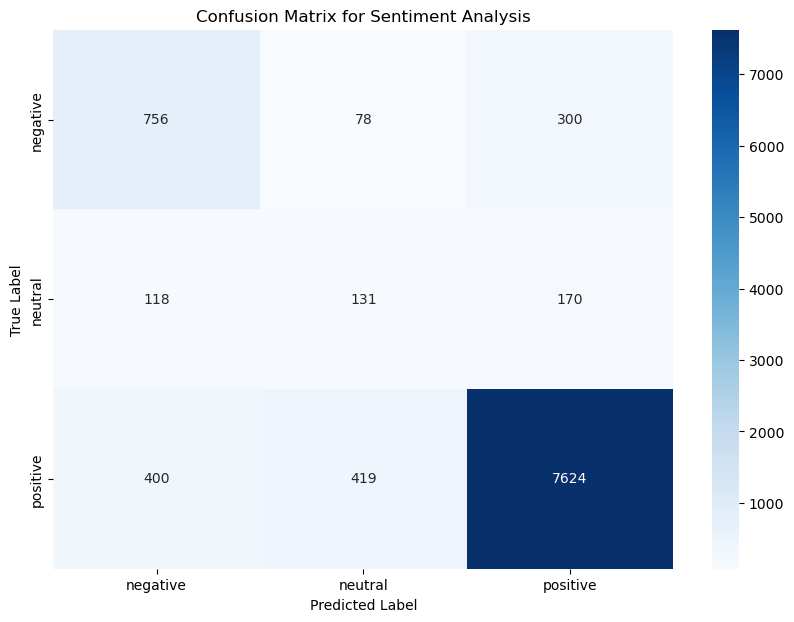

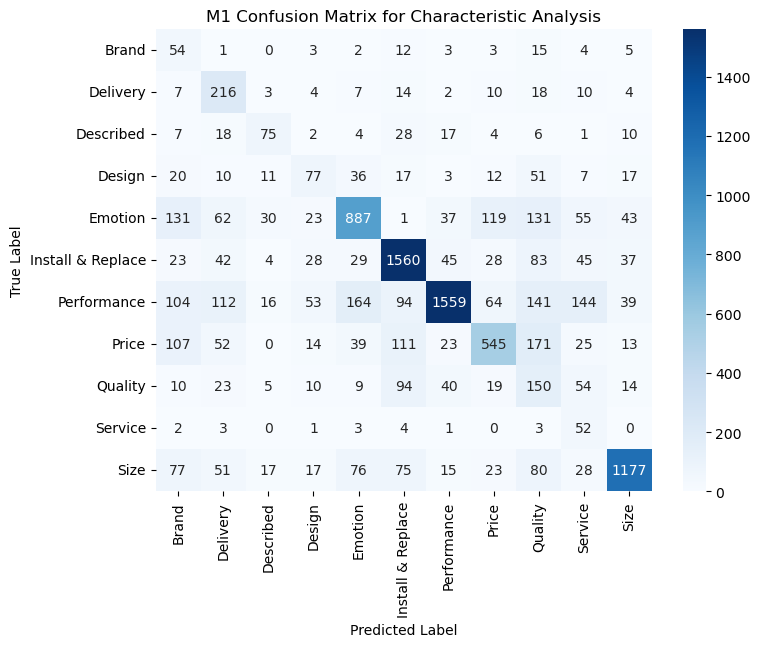

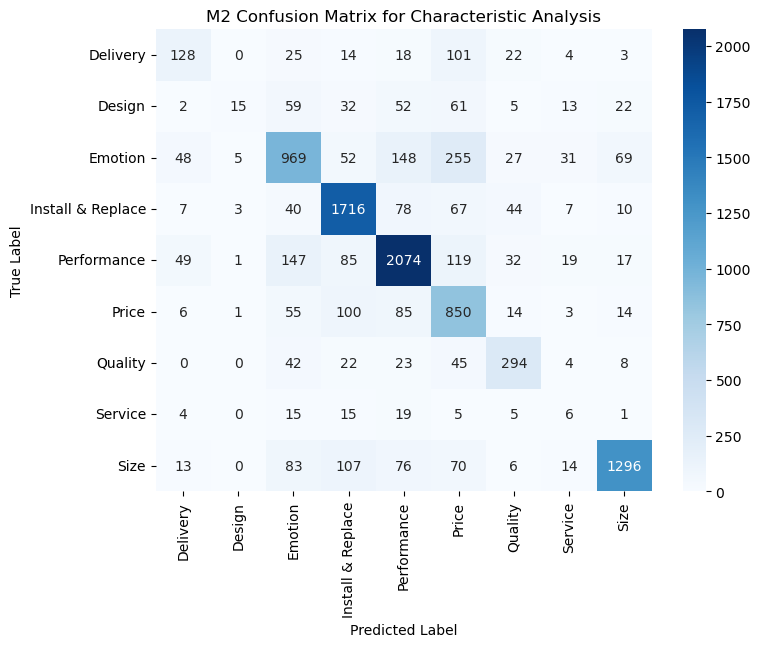

In [93]:
# Convert columns to lowercase to ensure consistency
data['Sentiment_Label'] = data['Sentiment_Label'].astype(str)
data['Sentiment_Polarity'] = data['Sentiment_Polarity'].astype(str)
data['Characteristic_Label_M1'] = data['Characteristic_Label_M1'].astype(str)
data['Characteristic_Label_M2'] = data['Characteristic_Label_M2'].astype(str)
data['Characteristic_M1'] = data['Characteristic_M1'].astype(str)
data['Characteristic_M2'] = data['Characteristic_M2'].astype(str)

# Remove rows with NaN in the 'Characteristic' column
data_cleaned = data.dropna()


# Compute confusion matrices
sentiment_conf_matrix = confusion_matrix(data_cleaned['Sentiment_Label'], data_cleaned['Sentiment_Polarity'])
m1_characteristic_conf_matrix = confusion_matrix(data_cleaned['Characteristic_Label_M1'], data_cleaned['Characteristic_M1'])
m2_characteristic_conf_matrix = confusion_matrix(data_cleaned['Characteristic_Label_M2'], data_cleaned['Characteristic_M2'])

# Plotting the confusion matrix for Sentiment Analysis
plt.figure(figsize=(10, 7))
sns.heatmap(sentiment_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(data_cleaned['Sentiment_Polarity'].unique()),
            yticklabels=sorted(data_cleaned['Sentiment_Label'].unique()))
plt.title('Confusion Matrix for Sentiment Analysis')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting the confusion matrix for Characteristic Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(m1_characteristic_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(data_cleaned['Characteristic_M1'].dropna().unique()),
            yticklabels=sorted(data_cleaned['Characteristic_Label_M1'].dropna().unique()))
plt.title('M1 Confusion Matrix for Characteristic Analysis')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting the confusion matrix for Characteristic Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(m2_characteristic_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(data_cleaned['Characteristic_M2'].dropna().unique()),
            yticklabels=sorted(data_cleaned['Characteristic_Label_M2'].dropna().unique()))
plt.title('M2 Confusion Matrix for Characteristic Analysis')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to calculate accuracy, precision, recall, and F1 score
def calculate_metrics(conf_matrix):
    # Extracting values from confusion matrix
    # Assuming binary classification [TN, FP], [FN, TP]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]
    
    # Calculate Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    # Calculate Precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    
    # Calculate Recall (Sensitivity)
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    # Calculate F1 Score
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    return accuracy, precision, recall, f1



In [95]:
from sklearn.metrics import classification_report

# Calculate metrics for Sentiment Analysis
print("Sentiment Analysis Classification Report:")
sentiment_report = classification_report(
    data_cleaned['Sentiment_Label'],  # True labels
    data_cleaned['Sentiment_Polarity'],  # Predicted labels
    target_names=sorted(data_cleaned['Sentiment_Label'].unique())
)
print(sentiment_report)



Sentiment Analysis Classification Report:
              precision    recall  f1-score   support

    negative       0.59      0.67      0.63      1134
     neutral       0.21      0.31      0.25       419
    positive       0.94      0.90      0.92      8443

    accuracy                           0.85      9996
   macro avg       0.58      0.63      0.60      9996
weighted avg       0.87      0.85      0.86      9996



In [96]:
# Calculate metrics for M1 Characteristic Analysis
print("\nM1 Characteristic Analysis Classification Report:")
m1_report = classification_report(
    data_cleaned['Characteristic_Label_M1'],  # True labels
    data_cleaned['Characteristic_M1'],  # Predicted labels
    target_names=sorted(data_cleaned['Characteristic_Label_M1'].unique())
)
print(m1_report)




M1 Characteristic Analysis Classification Report:
                   precision    recall  f1-score   support

            Brand       0.10      0.53      0.17       102
         Delivery       0.37      0.73      0.49       295
        Described       0.47      0.44      0.45       172
           Design       0.33      0.30      0.31       261
          Emotion       0.71      0.58      0.64      1519
Install & Replace       0.78      0.81      0.79      1924
      Performance       0.89      0.63      0.74      2490
            Price       0.66      0.50      0.57      1100
          Quality       0.18      0.35      0.23       428
          Service       0.12      0.75      0.21        69
             Size       0.87      0.72      0.79      1636

         accuracy                           0.64      9996
        macro avg       0.50      0.58      0.49      9996
     weighted avg       0.73      0.64      0.67      9996



In [86]:
# Calculate metrics for M2 Characteristic Analysis
print("\nM2 Characteristic Analysis Classification Report:")
m2_report = classification_report(
    data_cleaned['Characteristic_Label_M2'],  # True labels
    data_cleaned['Characteristic_M2'],  # Predicted labels
    target_names=sorted(data_cleaned['Characteristic_Label_M2'].unique())
)
print(m2_report)



M2 Characteristic Analysis Classification Report:
                   precision    recall  f1-score   support

         Delivery       0.50      0.41      0.45       315
           Design       0.60      0.06      0.10       261
          Emotion       0.68      0.60      0.64      1604
Install & Replace       0.80      0.87      0.83      1972
      Performance       0.81      0.82      0.81      2543
            Price       0.54      0.75      0.63      1128
          Quality       0.65      0.67      0.66       438
          Service       0.06      0.09      0.07        70
             Size       0.90      0.78      0.83      1665

         accuracy                           0.74      9996
        macro avg       0.61      0.56      0.56      9996
     weighted avg       0.74      0.74      0.73      9996

